# Assignment 3 (Part 1)

Part 1 of the third assignment is worth 25 points.

## Neural Networks

Also known as Multi-Layer-Perceptrons (MLP). Hence for this assignment you will use the MLPClassifier class from Sklearn. 

Take a look at the documentation to learn more about the default parameterisation (which activation function it uses, which optimizer/solver it uses, number and size of hidden layers, etc.) of the MLPClassifer: 

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html. 


This parctical part of the assignment is devided in 2 main tasks:


*   Training a neural network on MNIST data (3 points)
*   Training a neural networks on customer data (22 points)







### Task 1: Neural Network Classifier on MNIST 

In [2]:
# load required libraries
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The task will be to perform classification on handwritten digits from 0 to 9 (MNIST dataset). (We've seen this dataset in the previous assignment)

In [3]:
# download dataset from https://www.openml.org/ which contains many sample datasets for machine learning
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

**Recap**: The dataset contains 70000 examples of which each example has 784 values (pixels). These pixels are in a flat array but represent a 28 by 28 pixel gray-scale image. Values range from 0 to 255 which is common in the RGB value range. A value of 0 represents a black pixel whereas 255 represents a white pixel. Different shades of gray are any value larger than 0 but smaller than 255.

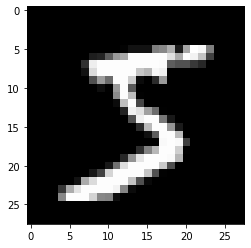

In [4]:
# if we want to plot a single example we need to reshape the array
first_image = np.array(X[0:1], dtype='float').reshape((28, 28))
plt.imshow(first_image, cmap='gray')

#### Instructions

**You are expected to do:**


*   Data preparation: 
 *   Perform a 80/20 train/test split
 *   Perform feature scaling
*   Train the model
 *   Please use `MLPClassifier` from `sklearn.neural_network`
*   Evaluate the model performance
 *   Calculate the accuracy
 *   Plot the confusion matrix
 *   Additionally, plot some misclassified instances  (if there are any). You can use the plt.imshow() function as shown above
* Compare the model performance with the results of the softmax regression on MNIST in the previous assignment



In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
x_train.shape, x_test.shape

((56000, 784), (14000, 784))

In [6]:
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [7]:
classifier = MLPClassifier()
classifier.fit(x_train_scaled, y_train)

MLPClassifier()

In [8]:
predictions = classifier.predict(x_test_scaled)
predictions.shape

(14000,)

In [9]:
score = classifier.score(x_test_scaled, y_test)
score

0.9785714285714285

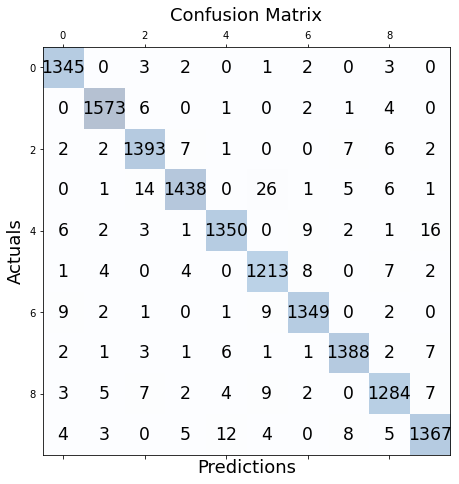

In [10]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


**Misclassified instances**

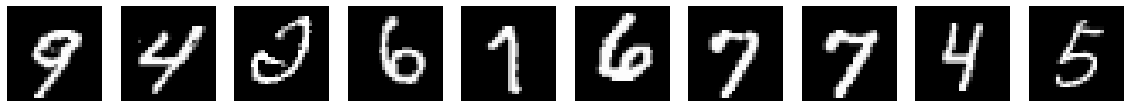

In [11]:
f, axes = plt.subplots(1, 10, sharey=True,figsize=(20,20))
misclassified = np.where(y_test!= predictions)[0]

for i,ax in enumerate(axes.flat):

    ax.axis('off')

    ax.imshow(np.array(X[(misclassified[i]-1):(misclassified[i])], dtype='float').reshape((28, 28)), cmap='gray')


### Task 2: neural network classifier


In [1]:
# load required libraries
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Dataset 

This is a classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository and contains >41k records. You can find more information about the features (attributes) on the official UCI website:
https://archive.ics.uci.edu/ml/datasets/bank+marketing

The dataset gives you information about a marketing campaign of a financial institution in which can be analysed in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

The target variable is called 'deposit' which describes if a person has subscribed to a term deposit (German: "Termineinlage", more information: https://www.investopedia.com/terms/t/termdeposit.asp).

---

Your task will be to train a neural network which will be used to predict if a person will subscribe to a term deposit.

In [11]:
# Import the data
data = pd.read_csv('https://raw.githubusercontent.com/schneiderson/ATIT2-22/main/sample_data/bank.csv')
#X = data.iloc[:, :-1]
#y = data.iloc[:, -1]

X = data.copy()

print(X.shape)

(11162, 17)


#### Instructions

This task will combine a lot of different aspect of what we have discussed in class over the past weeks.

**You are expected to do:**

*   **Data exploration** (6 points):
 *   Check which features are available. 
 > *   Can some features directly be discarded?
 *   Check if data is messy (e.g. missing values)
 *   Check for correlation with target variable
 *   Look for outliers
 *   Class distribution
*   **Data preparation** (6 points):
 *   Perform some data cleaning e.g.
  >  *   Replace missing values
  >  *   Outlier handling
  >  *   Removal of duplicates
 *   Convert non-numeric features to numeric features
 *   Perform a 80/20 train/test split
 *   Perform feature scaling
 *   In case of class imbalance, think about how you want to deal with it. Please briefly explain your decision.
*   **Training and model evaluation** (10 points):
 *   Please use `MLPClassifier` from `sklearn.neural_network`
 > *   The model should have 4 hidden layers with sizes hidden_layer_size=(10, 1) (parameter hidden_layer_sizes)
 > *   Set the batch_size to 64
 *   Evaluate the model performance
 > *   Calculate the accuracy and other metrics which might be helpful to evaluate the model's performance
 > *   Based on you findings, describe some measures you could take to improve the model's performance even further.
 > *   Try to analyse if you see indications of underfitting or overfitting and which countermeasures you could take.
 *   Please train another model using one of the techniques we have discussed in the lectures and compare the performance to the performance achieved with the neural network.


**For each decision you make, briefly explain your reasoning.**



**Data exploration (6 points):**

In [12]:
X.describe()
print(X)

       age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \

In [13]:
X.select_dtypes('object').describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


**Data preparation (6 points):**

In [15]:
X = X.drop(['duration'], axis = 1)

KeyError: ignored

In [15]:
X.isnull().sum()  #No null values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

--> all are zero values , so we dont have any *NaN* values in this data set

In [16]:
print(X.duplicated().value_counts()) # To check duplicated values

False    11161
True         1
dtype: int64


In [19]:
X = X.drop_duplicates()

False    11161
dtype: int64


In [20]:
numericlist = X._get_numeric_data().columns.tolist()
print(numericlist)

['age', 'balance', 'day', 'campaign', 'pdays', 'previous']


In [21]:
for values in numericlist :
  print(X[values])
  print("--------------------------------------------")

0        59
1        56
2        41
3        55
4        54
         ..
11157    33
11158    39
11159    32
11160    43
11161    34
Name: age, Length: 11161, dtype: int64
--------------------------------------------
0        2343
1          45
2        1270
3        2476
4         184
         ... 
11157       1
11158     733
11159      29
11160       0
11161       0
Name: balance, Length: 11161, dtype: int64
--------------------------------------------
0         5
1         5
2         5
3         5
4         5
         ..
11157    20
11158    16
11159    19
11160     8
11161     9
Name: day, Length: 11161, dtype: int64
--------------------------------------------
0        1
1        1
2        1
3        1
4        2
        ..
11157    1
11158    4
11159    2
11160    2
11161    1
Name: campaign, Length: 11161, dtype: int64
--------------------------------------------
0         -1
1         -1
2         -1
3         -1
4         -1
        ... 
11157     -1
11158     -1
11159     -1

In [22]:
lencoder = LabelEncoder()

cols = ['job', 'marital', 'education', 'default','housing', 'loan','contact', 'month','poutcome','deposit']
X[cols] = X[cols].apply(LabelEncoder().fit_transform)

X.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,2,-1,0,3,1


---

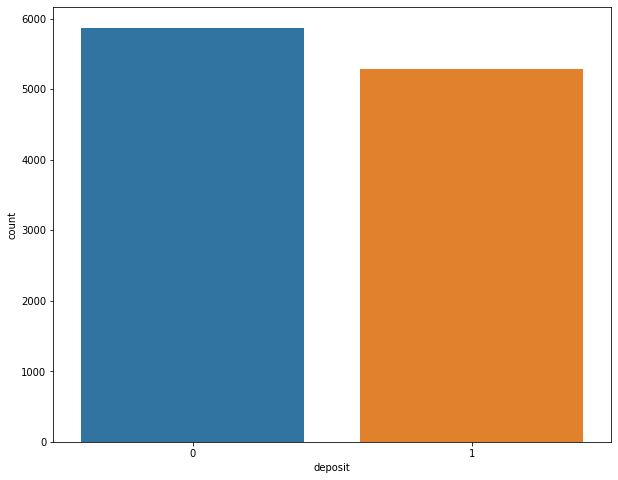

In [23]:
#looking for class imbalance 

import seaborn as sns
plt.rcParams["figure.figsize"] = (10, 8)
X['deposit'].value_counts()
sns.countplot(x='deposit', data=X)
plt.show()

--> class is more or less in balance 

In [24]:
Y = X['deposit']
X_2 = X.drop(['deposit'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X_2, Y, train_size = 0.8, random_state=100)

In [25]:
scaler2 = MinMaxScaler()

X_train_scaled = scaler2.fit_transform(X_train)
X_test_scaled = scaler2.transform(X_test)

print(X.shape)
print(X_train.shape)
print(X_train_scaled.shape)
print(y_train.shape)

(11161, 16)
(8928, 15)
(8928, 15)
(8928,)


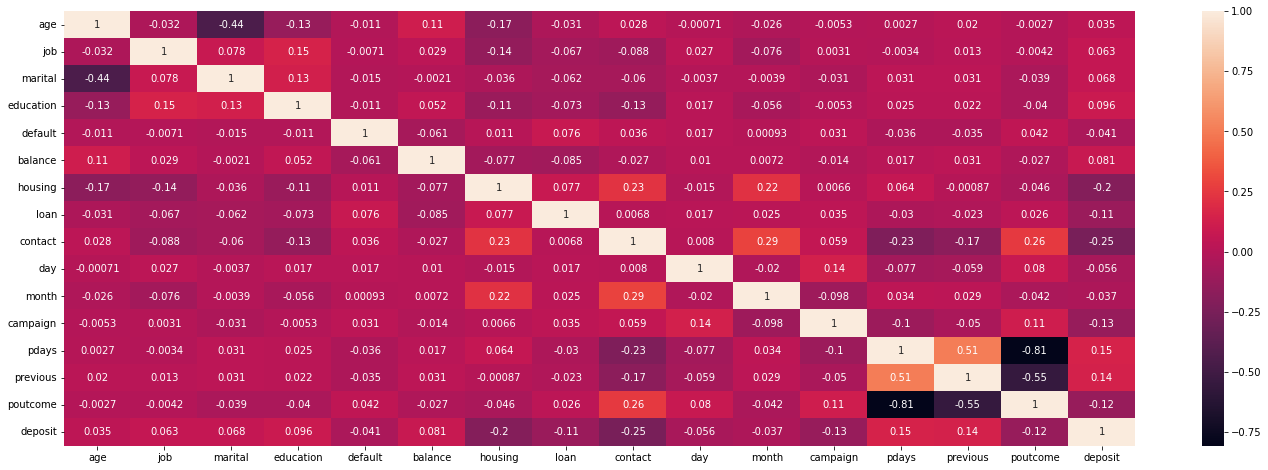

In [26]:
plt.rcParams["figure.figsize"] = (24, 8)
sns.heatmap(X.corr(),annot=True);

In [27]:
#The model should have 4 hidden layers with sizes hidden_layer_size=(10, 1) (parameter hidden_layer_sizes)
#Set the batch_size to 64

classifier = MLPClassifier(hidden_layer_sizes=(20,20,20,20),batch_size=(64))
classifier.fit(X_train_scaled, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=64, hidden_layer_sizes=(20, 20, 20, 20))

In [23]:
predictions = classifier.predict(X_test_scaled)
print(classifier.score(X_test_scaled, y_test))
print(classifier.predict(X_test[0:10]))

0.8163905060456784
[1 0 0 1 0 1 1 1 1 0]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1176
           1       0.80      0.82      0.81      1057

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


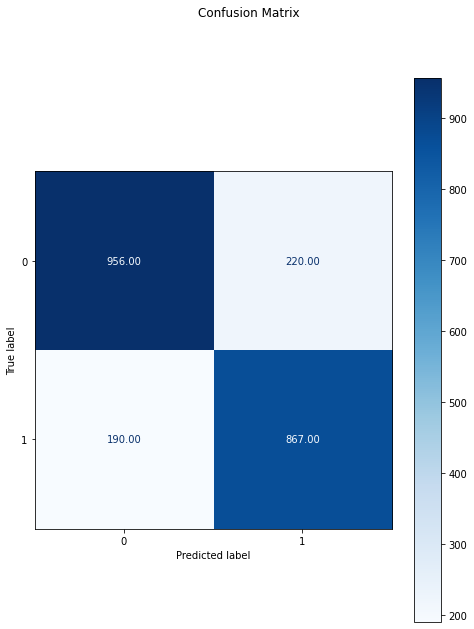

In [25]:
from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"] = (8, 10)
fig=plot_confusion_matrix(classifier, X_test_scaled, y_test,display_labels=["0",'1'],cmap=plt.cm.Blues,values_format = '.2f')
fig.figure_.suptitle("Confusion Matrix ")
plt.show()


#### Further tips for working on the assignment:

When analyzing the model's performance, please think about what the baseline performance of the task would be and if your model performs better or not. It is quite unlikely the model will get a perfect score with the given parametrization. You can try to improve the performance by varying several hyperparameters of the model (e.g. number of hidden layers and number of neurons in a hidden layer, batch_size, training epochs, etc.). 

Please be aware that too many hidden layers and neurons and a large number of epochs will cause the model to train longer. If the model is too complex you might encounter time-outs in Colab.

If the number of epochs is too low, sklearn will show a warning that the model has not yet converged.